In [12]:
import duckdb

# Path to your CSV file
csv_path = "/home/mremington/Documents/therma_sim/therma_sim/src/therma_sim/Results/Rattlesnake.csv"

# Connect to an in-memory DuckDB database
con = duckdb.connect(database=":memory:")

# Load the CSV into DuckDB
con.execute(f"CREATE TABLE rattlesnake AS SELECT * FROM read_csv_auto('{csv_path}');")




In [13]:
# Query to calculate the proportion of individuals performing each behavior per time step
query = """
SELECT 
    agent_id
FROM rattlesnake
WHERE Alive = 1  -- Ensure only living individuals are counted
limit 10
"""

# Execute query and fetch results
df = con.execute(query).fetchdf()
df.head()

,Agent_id
0,2266
1,2305
2,2288
3,2285
4,2199


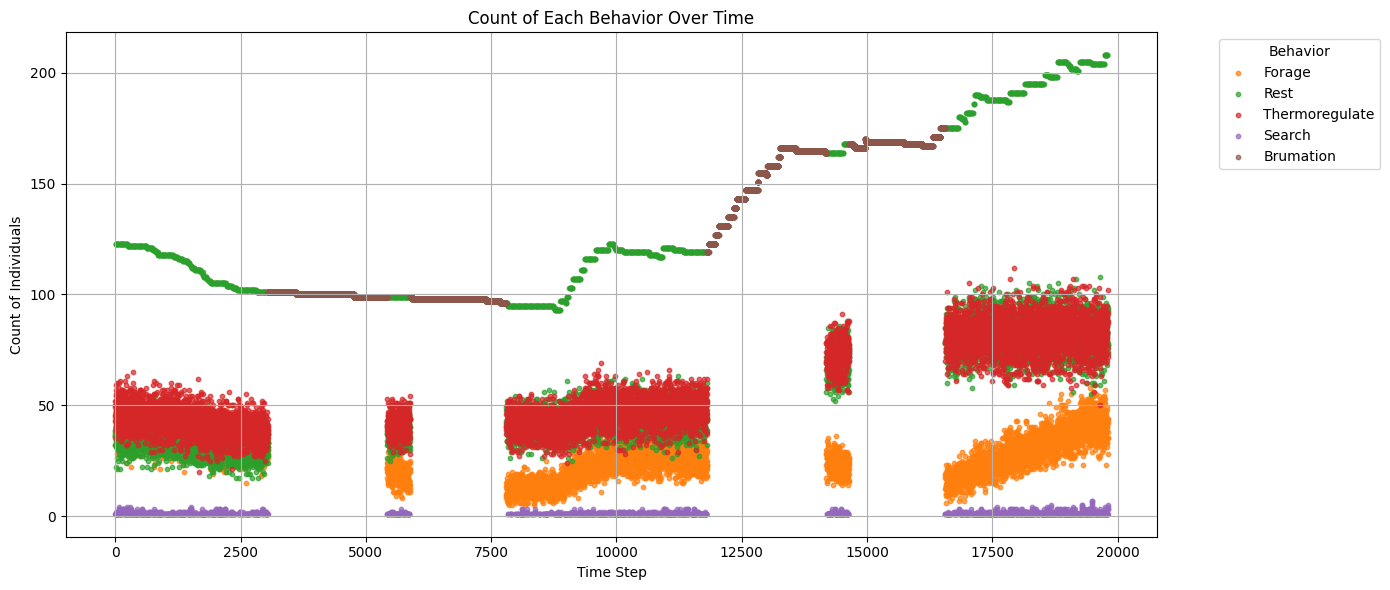

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Query to calculate the proportion of individuals performing each behavior per time step
query = """
SELECT 
    Time_Step, 
    Behavior, 
    COUNT(*) AS count_behavior,
    COUNT(*) * 1.0 / SUM(COUNT(*)) OVER (PARTITION BY Time_Step) AS proportion
FROM rattlesnake
WHERE Alive = 1  -- Ensure only living individuals are counted
GROUP BY Time_Step, Behavior
ORDER BY Time_Step, Behavior;
"""

# Execute query and fetch results
df = con.execute(query).fetchdf()

# Unique behaviors for coloring
behaviors = df['Behavior'].unique()
plt.figure(figsize=(14, 6))
# Manual scatter plotting
for behavior in behaviors:
    subset = df[df['Behavior'] == behavior]
    plt.scatter(subset['Time_Step'], subset['count_behavior'], label=behavior, s=10, alpha=0.7)

# Labels and styling
plt.xlabel("Time Step")
plt.ylabel("Count of Individuals")
plt.title("Count of Each Behavior Over Time")
plt.legend(title="Behavior", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()


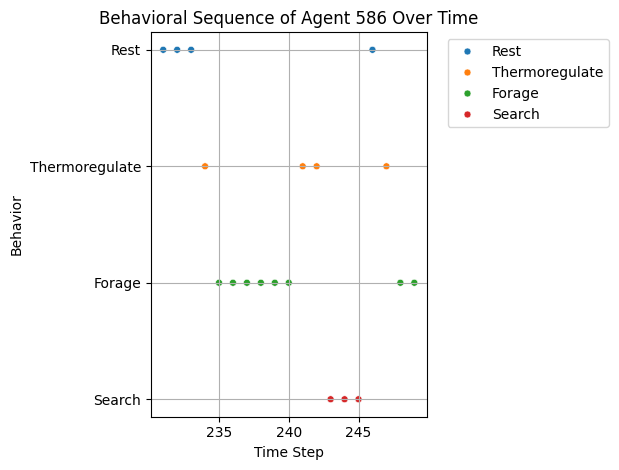

In [23]:
# Query to calculate the proportion of individuals performing each behavior per time step
query = """
SELECT 
    Time_Step, 
    Behavior, 
    COUNT(*) AS count_behavior,
    COUNT(*) * 1.0 / SUM(COUNT(*)) OVER (PARTITION BY Time_Step) AS proportion
FROM rattlesnake
WHERE Alive = 1  -- Ensure only living individuals are counted
    AND Agent_ID=2266
GROUP BY Time_Step, Behavior
ORDER BY Time_Step, Behavior;
"""

# Execute query and fetch results
df = con.execute(query).fetchdf()
df = df[(df['Time_Step'] > 230) & (df['Time_Step'] < 250)]  # Filter for time steps less than 1000
behavior_wide = df.pivot(index='Time_Step', columns='Behavior', values='count_behavior').fillna(0)

# Scatter with color-coded behavior
sns.scatterplot(data=df, x='Time_Step', y='Behavior', hue='Behavior', palette='tab10', s=25)

plt.title("Behavioral Sequence of Agent 586 Over Time")
plt.xlabel("Time Step")
plt.ylabel("Behavior")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


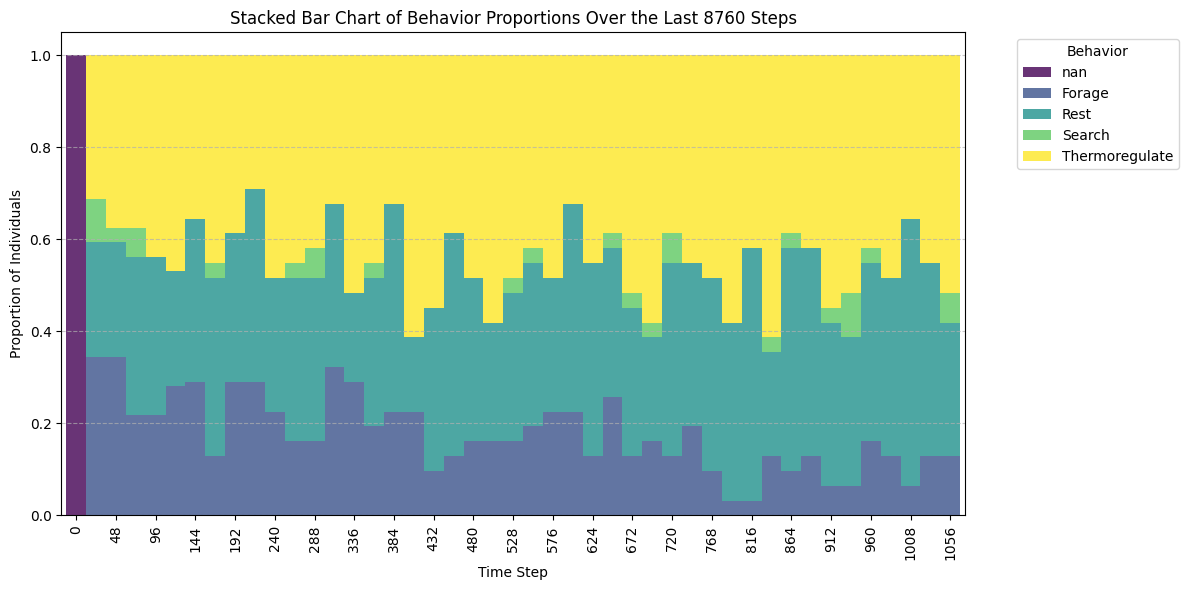

In [3]:
# Filter df to the last 8760 time steps


if 'df' in locals() or 'df' in globals():
    df_filtered = df[df["Time_Step"] >= df["Time_Step"].max() - 8760]

    # Pivot to get behaviors as columns
    df_pivot = df_filtered.pivot(index="Time_Step", columns="Behavior", values="proportion")

    # Optional: downsample to 1 bar per day
    df_pivot = df_pivot.iloc[::24]

    # Create figure and axis manually for more control
    fig, ax = plt.subplots(figsize=(12, 6))

    df_pivot.plot(
        kind="bar",
        stacked=True,
        colormap="viridis",
        alpha=0.8,
        width=1.0,
        ax=ax
    )

    # Labels and title
    ax.set_xlabel("Time Step")
    ax.set_ylabel("Proportion of Individuals")
    ax.set_title("Stacked Bar Chart of Behavior Proportions Over the Last 8760 Steps")

    # Clean legend and grid
    ax.legend(title="Behavior", bbox_to_anchor=(1.05, 1), loc="upper left")
    ax.grid(axis="y", linestyle="--", alpha=0.7)

    # Optional: thin x-axis ticks
    ax.set_xticks(ax.get_xticks()[::max(1, len(ax.get_xticks()) // 20)])

    plt.tight_layout()
    plt.show()
else:
    print("Dataframe `df` is not defined. Please rerun the DuckDB query and try again.")


In [16]:
# Check how many NaN behaviors exist
nan_behavior_count = df_filtered["Behavior"].isna().sum()
print(f"Number of rows with NaN in 'Behavior': {nan_behavior_count}")
nan_behavior_count
nan_behaviort = df_filtered[df_filtered["Behavior"].isna()]
nan_behaviort.head()


Number of rows with NaN in 'Behavior': 32


,Time_Step,Behavior,count_behavior,proportion
89496,44108,None,5,0.010000
90025,44284,None,4,0.008097
90194,44340,None,4,0.008147
90705,44510,None,4,0.008316
91363,44729,None,4,0.008457


In [ ]:
# Query to calculate the proportion of individuals performing each behavior per time step
query = """
SELECT 
    Time_Step, 
    Behavior, 
    sum(),
    COUNT(*) * 1.0 / SUM(COUNT(*)) OVER (PARTITION BY Time_Step) AS proportion
FROM rattlesnake
WHERE Behavior == 'Forage'
GROUP BY Time_Step, Behavior
ORDER BY Time_Step, Behavior;
"""

# Execute query and fetch results
df = con.execute(query).fetchdf()

# Create a seaborn line plot to visualize the proportion of each behavior over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Time_Step", y="proportion", hue="Behavior")

# Labels and title
plt.xlabel("Time Step")
plt.ylabel("Proportion of Individuals")
plt.title("Proportion of Each Behavior Over Time")
plt.legend(title="Behavior", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)

# Show the plot
plt.show()


In [22]:
# Query to calculate the proportion of individuals performing each behavior per time step
query = """
SELECT *
FROM rattlesnake
WHERE Time_Step = 44108  -- Ensure only living individuals are counted
order by Behavior
"""

# Execute query and fetch results
df = con.execute(query).fetchdf()
print(df)

     Time_Step  Hour  Day  Month  Year  Agent_id  Active  Alive Behavior  \
0        44108    20   13      6  2005     39409    True   True   Forage   
1        44108    20   13      6  2005     34304    True   True   Forage   
2        44108    20   13      6  2005     40933    True   True   Forage   
3        44108    20   13      6  2005     29304    True   True   Forage   
4        44108    20   13      6  2005     41245    True   True   Forage   
..         ...   ...  ...    ...   ...       ...     ...    ...      ...   
495      44108    20   13      6  2005     44529   False   True     None   
496      44108    20   13      6  2005     44532   False   True     None   
497      44108    20   13      6  2005     44531   False   True     None   
498      44108    20   13      6  2005     44530   False   True     None   
499      44108    20   13      6  2005     44528   False   True     None   

    Microhabitat  Body_Temperature  Metabolic_State  Handling_Time  \
0           Open 